# More on Texts Analytics

#  Topics we will cover

### Sentiment Analysis:  Determine whether feedbacks and comments are positive, negative, or neutral and apply the infomration for customer support/Social media monitoring etc.

### Text Classification:  Supervised ML method to classify text into predefined categories such as spam filtering.

### Named Entity Recognition (NER): Finding import entities such as people, places, numbers from the text.


### Topic Modeling: Identifying topics and themes in the text data.

### Text Clustering: Grouping similar texts into into clusters or groups  for  document retrieval, summarization etc.

# Libraries 
### TextBlob:  for part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation. Find more https://textblob.readthedocs.io/en/dev/
### NLTK ( Natural Language Tool Kit) : Comprehensive Taxt Analytics API. Find more https://www.nltk.org/
### Textatistic: To check the readability of the texts. Find more https://pypi.org/project/textatistic/
### spaCy : More advanced text analytics.  Find more  https://spacy.io/usage

# TextBlob (cont.)
### Project Gutenberg
* Great source of text for analysis is the free e-books at Project Gutenberg:
> https://www.gutenberg.org

## Create a TextBlob
1. **Tokenization**: Breaking text into words or sentences.
2. Part-of-speech (POS) tagging: Tagging each word with its corresponding part of speech (noun, verb, adjective, etc.).
3. Noun Phrase Extraction: Identifying and extracting noun phrases from text.
4. **Sentiment Analysis**: Determining the sentiment (positive, negative, or neutral) of a text.
5. Word Inflection: Converting words between their different forms (plural, singular, different tenses, etc.).
6. Translation: Translating text between different languages.
7. Spell Correction: Correcting spelling mistakes in the text.
8. Parsing: Parsing text to analyze its grammatical structure.
9. **n-grams Generation**: Generating n-grams (sequences of n words) from the text.
10. **Text Classification**: Assigning predefined categories or labels to text documents.
11. **Parsing**: Analyzing the structure of text to extract information.
12. N-gram Tagging: Tagging sequences of n words with part-of-speech tags.


In [1]:
from textblob import TextBlob

In [2]:
# !pip install textblob

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from textblob import TextBlob
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'

In [5]:
blob = TextBlob(text)

In [6]:
from textblob import TextBlob
text = "The quick brown fox jumps over the lazy dog. Suddenly, \
a loud noise startled the animals in the forest."
# Create a TextBlob object
blob = TextBlob(text)
# Tokenize the text
tokens = blob.words
print(tokens)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'Suddenly', 'a', 'loud', 'noise', 'startled', 'the', 'animals', 'in', 'the', 'forest']


In [7]:
print(text.split())

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.', 'Suddenly,', 'a', 'loud', 'noise', 'startled', 'the', 'animals', 'in', 'the', 'forest.']


In [8]:
blob.sentences

[Sentence("The quick brown fox jumps over the lazy dog."),
 Sentence("Suddenly, a loud noise startled the animals in the forest.")]

In [9]:
blob

TextBlob("The quick brown fox jumps over the lazy dog. Suddenly, a loud noise startled the animals in the forest.")

## Sentiment Analysis with TextBlob’s Default Sentiment Analyzer
* Determines whether text is **positive**, **neutral** or **negative**. 
* One of the most common and valuable NLP tasks (several later case studies do it) 
* Consider the **positive word “good”** and the **negative word “bad"**
    * Alone they are positive and negative, respectively, but...
    * **The food is not good** — clearly has negative sentiment
    * **The movie was not bad** — clearly has positive sentiment (but not as positive as **The movie was excellent!**)
* Complex **machine-learning problem**, but libraries like TextBlob can do it for you

### Getting the Sentiment of a TextBlob

In [10]:
blob

TextBlob("The quick brown fox jumps over the lazy dog. Suddenly, a loud noise startled the animals in the forest.")

In [11]:
blob.sentiment

Sentiment(polarity=0.06111111111111111, subjectivity=0.7666666666666666)

* **`polarity`** is the **sentiment** — from **`-1.0` (negative)** to **`1.0` (positive)** with **`0.0`** being **neutral**. 

    Polarity indicates the sentiment of a piece of text, such as a sentence or a document. It ranges from -1.0 (indicating very negative sentiment) to 1.0 (indicating very positive sentiment), with 0.0 representing neutral sentiment. Positive polarity suggests positive sentiment, while negative polarity suggests negative sentiment.

* **`subjectivity`** is a value from **0.0 (objective)** to **1.0 (subjective)**. 

    Subjectivity measures the extent to which a piece of text expresses personal opinions or feelings, rather than factual information. It ranges from 0.0 (indicating highly objective or factual content) to 1.0 (indicating highly subjective or opinionated content). A subjectivity score closer to 0.0 implies that the text is more objective, while a score closer to 1.0 suggests that the text is more subjective or opinion-based.
 

### Getting the polarity and subjectivity from the Sentiment Object
* **`%precision`** magic specifies the **default precision** for **standalone** `float` objects and `float` objects in **built-in types** like lists, dictionaries and tuples:

In [12]:
%precision 3

'%.3f'

In [13]:
blob.sentiment.polarity

0.061

In [14]:
blob.sentiment.subjectivity

0.767

### Getting the Sentiment of a Sentence 
* One is **positive (`0.85`)** and one is **negative (`-0.6999999999999998`)**, which might explain why the entire `TextBlob`’s `sentiment` was close to **`0.0` (neutral)**

In [15]:
blob.sentiment

Sentiment(polarity=0.06111111111111111, subjectivity=0.7666666666666666)

In [16]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.04166666666666666, subjectivity=0.75)
Sentiment(polarity=0.1, subjectivity=0.8)


**NOTE: Before running this notebook, place a copy of your downloaded RomeoAndJuliet.txt file in the same folder with this notebook.**

##  Word Frequencies
* Various techniques for detecting **similarity between documents** rely on **word frequencies**
* `TextBlob` can count word frequencies for you
* When you read a file with `Path`’s `read_text` method, it closes the file immediately after it finishes reading the file

In [17]:
from pathlib import Path

In [18]:
from textblob import TextBlob

In [19]:
rj = TextBlob(Path('RomeoAndJuliet.txt').read_text())
rj

TextBlob("THE TRAGEDY OF ROMEO AND JULIET



by William Shakespeare






Contents

THE PROLOGUE.

ACT I
Scene I. A public place.
Scene II. A Street.
Scene III. Room in Capulet’s House.
Scene IV. A Street.
Scene V. A Hall in Capulet’s House.


ACT II
CHORUS.
Scene I. An open place adjoining Capulet’s Garden.
Scene II. Capulet’s Garden.
Scene III. Friar Lawrence’s Cell.
Scene IV. A Street.
Scene V. Capulet’s Garden.
Scene VI. Friar Lawrence’s Cell.


ACT III
Scene I. A public Place.
Scene II. A Room in Capulet’s House.
Scene III. Friar Lawrence’s cell.
Scene IV. A Room in Capulet’s House.
Scene V. An open Gallery to Juliet’s Chamber, overlooking the Garden.


ACT IV
Scene I. Friar Lawrence’s Cell.
Scene II. Hall in Capulet’s House.
Scene III. Juliet’s Chamber.
Scene IV. Hall in Capulet’s House.
Scene V. Juliet’s Chamber; Juliet on the bed.


ACT V
Scene I. Mantua. A Street.
Scene II. Friar Lawrence’s Cell.
Scene III. A churchyard; in it a Monument belonging to the Capulets.




 Dramati

* Access the word frequencies through the `TextBlob`’s `word_counts` dictionary

In [22]:
rj.word_counts['juliet']

190

In [23]:
rj.word_counts['romeo']

315

In [ ]:
blob.word_counts['thou']

* If you already have tokenized a `TextBlob` into a `WordList`, you can count specific words in the list via the `count` method

In [ ]:
blob.words.count('joy')

##  Getting Definitions, Synonyms and Antonyms from WordNet
### Getting Definitions
* [**WordNet**](https://wordnet.princeton.edu/) is a **English word database** created by **Princeton University**
* TextBlob uses **NLTK’s WordNet interface** to look up word **definitions**, and get **synonyms** and **antonyms** 
* [NLTK WordNet interface documentation](https://www.nltk.org/api/nltk.corpus.reader.html#module-nltk.corpus.reader.wordnet)

In [24]:
from textblob import Word

In [25]:
happy = Word('happy')

* `Word` class’s `definitions` property returns a list of all the word’s definitions in the WordNet database

## Deleting Stop Words
* Common words that are often removed before analysis because they do not provide useful information
* Returned by the NLTK `stopwords` module’s [`words` function](https://www.nltk.org/book/ch02.html)

| NLTK’s English stop words list
| :---
| `['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']` 

## n-grams 
* [**n-gram**](https://en.wikipedia.org/wiki/N-gram) &mdash; a sequence of **n** text items, such as letters in words or words in a sentence. 
* Used to identify letters or words that frequently appear adjacent to one another
    * **Predictive text input**
    * **Speech-to-text**

In [26]:
from textblob import TextBlob

In [27]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'

In [28]:
blob = TextBlob(text)

* `TextBlob`’s `ngrams` method produces a list of `WordList` n-grams of length three by default—known as trigrams
* Use keyword argument `n` to produce n-grams of any desired length

In [29]:
blob.ngrams()

[WordList(['Today', 'is', 'a']),
 WordList(['is', 'a', 'beautiful']),
 WordList(['a', 'beautiful', 'day']),
 WordList(['beautiful', 'day', 'Tomorrow']),
 WordList(['day', 'Tomorrow', 'looks']),
 WordList(['Tomorrow', 'looks', 'like']),
 WordList(['looks', 'like', 'bad']),
 WordList(['like', 'bad', 'weather'])]

In [30]:
blob.ngrams(n=5)

[WordList(['Today', 'is', 'a', 'beautiful', 'day']),
 WordList(['is', 'a', 'beautiful', 'day', 'Tomorrow']),
 WordList(['a', 'beautiful', 'day', 'Tomorrow', 'looks']),
 WordList(['beautiful', 'day', 'Tomorrow', 'looks', 'like']),
 WordList(['day', 'Tomorrow', 'looks', 'like', 'bad']),
 WordList(['Tomorrow', 'looks', 'like', 'bad', 'weather'])]

In [31]:
rj.ngrams(n = 6)

[WordList(['THE', 'TRAGEDY', 'OF', 'ROMEO', 'AND', 'JULIET']),
 WordList(['TRAGEDY', 'OF', 'ROMEO', 'AND', 'JULIET', 'by']),
 WordList(['OF', 'ROMEO', 'AND', 'JULIET', 'by', 'William']),
 WordList(['ROMEO', 'AND', 'JULIET', 'by', 'William', 'Shakespeare']),
 WordList(['AND', 'JULIET', 'by', 'William', 'Shakespeare', 'Contents']),
 WordList(['JULIET', 'by', 'William', 'Shakespeare', 'Contents', 'THE']),
 WordList(['by', 'William', 'Shakespeare', 'Contents', 'THE', 'PROLOGUE']),
 WordList(['William', 'Shakespeare', 'Contents', 'THE', 'PROLOGUE', 'ACT']),
 WordList(['Shakespeare', 'Contents', 'THE', 'PROLOGUE', 'ACT', 'I']),
 WordList(['Contents', 'THE', 'PROLOGUE', 'ACT', 'I', 'Scene']),
 WordList(['THE', 'PROLOGUE', 'ACT', 'I', 'Scene', 'I']),
 WordList(['PROLOGUE', 'ACT', 'I', 'Scene', 'I', 'A']),
 WordList(['ACT', 'I', 'Scene', 'I', 'A', 'public']),
 WordList(['I', 'Scene', 'I', 'A', 'public', 'place']),
 WordList(['Scene', 'I', 'A', 'public', 'place', 'Scene']),
 WordList(['I', 'A', 

https://www.kaggle.com/competitions/commonlitreadabilityprize

In [32]:
import pandas as pd
textdata = pd.read_csv('textdata.csv')
textdata.head()

,Unnamed: 0,id,excerpt
0,0,c12129c31,When the young people returned to the ballroom...
1,1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh..."
2,2,b69ac6792,"As Roger had predicted, the snow departed as q..."
3,3,dd1000b26,And outside before the palace a great garden w...
4,4,37c1b32fb,Once upon a time there were Three Bears who li...


In [33]:
textdata =  textdata[['id', 'excerpt']]
textdata.shape

(2834, 2)

In [34]:
textdata.head()

,id,excerpt
0,c12129c31,When the young people returned to the ballroom...
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh..."
2,b69ac6792,"As Roger had predicted, the snow departed as q..."
3,dd1000b26,And outside before the palace a great garden w...
4,37c1b32fb,Once upon a time there were Three Bears who li...


In [35]:
textdata.excerpt[0]

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [36]:
list(textdata.excerpt)[:3]

['When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

[nltk_data] Downloading package stopwords to /Users/mann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


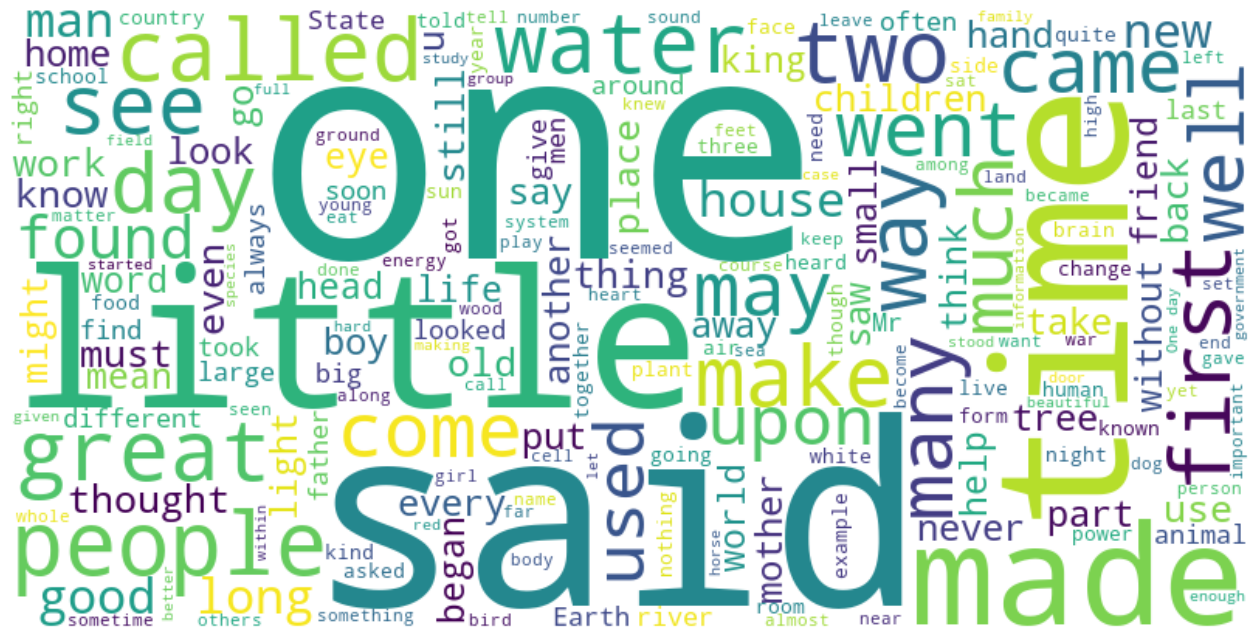

In [37]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


# Combine the texts from the 'excerpt' column
combined_text = " ".join(textdata['excerpt'])

# Remove symbols
combined_text_cleaned = combined_text.translate(str.maketrans('', '', string.punctuation))

# Tokenize the combined text
tokens = word_tokenize(combined_text_cleaned)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Join the filtered tokens back into a single string
filtered_text = " ".join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [38]:
rj

TextBlob("THE TRAGEDY OF ROMEO AND JULIET



by William Shakespeare






Contents

THE PROLOGUE.

ACT I
Scene I. A public place.
Scene II. A Street.
Scene III. Room in Capulet’s House.
Scene IV. A Street.
Scene V. A Hall in Capulet’s House.


ACT II
CHORUS.
Scene I. An open place adjoining Capulet’s Garden.
Scene II. Capulet’s Garden.
Scene III. Friar Lawrence’s Cell.
Scene IV. A Street.
Scene V. Capulet’s Garden.
Scene VI. Friar Lawrence’s Cell.


ACT III
Scene I. A public Place.
Scene II. A Room in Capulet’s House.
Scene III. Friar Lawrence’s cell.
Scene IV. A Room in Capulet’s House.
Scene V. An open Gallery to Juliet’s Chamber, overlooking the Garden.


ACT IV
Scene I. Friar Lawrence’s Cell.
Scene II. Hall in Capulet’s House.
Scene III. Juliet’s Chamber.
Scene IV. Hall in Capulet’s House.
Scene V. Juliet’s Chamber; Juliet on the bed.


ACT V
Scene I. Mantua. A Street.
Scene II. Friar Lawrence’s Cell.
Scene III. A churchyard; in it a Monument belonging to the Capulets.




 Dramati

Mask shape: (2400, 2400, 3)


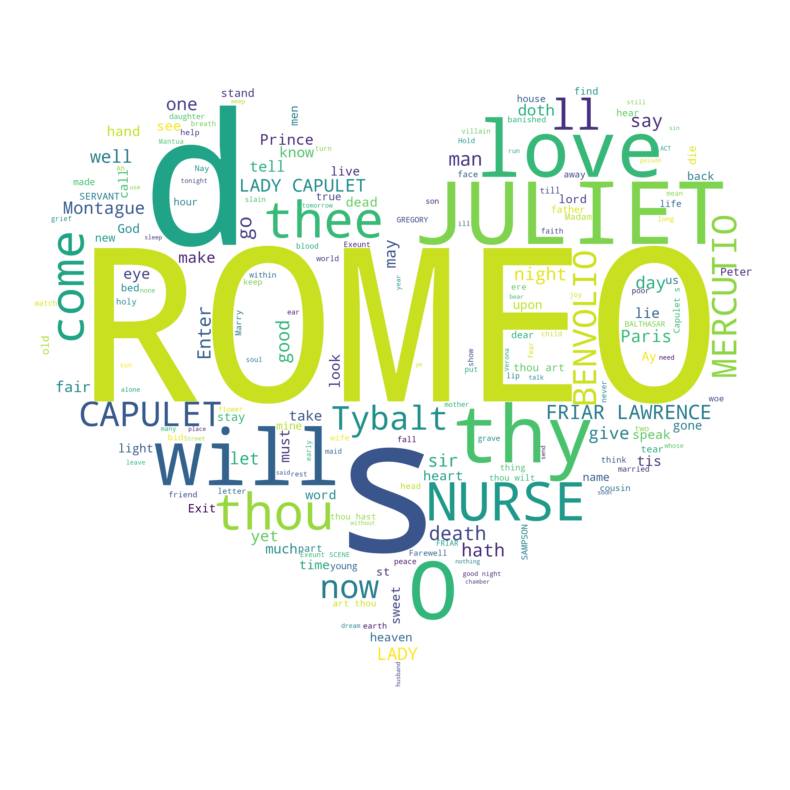

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

processed_text = ' '.join(rj.words)  
heart_mask = np.array(Image.open("mask_heart.png"))  
# Check the shape of the loaded mask
print("Mask shape:", heart_mask.shape)

# Generate a word cloud
wordcloud = WordCloud(mask=heart_mask, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [40]:
from nltk.tokenize import word_tokenize

In [41]:
textdata['tokens'] = textdata['excerpt'].apply(word_tokenize)
textdata.head()

,id,excerpt,tokens
0,c12129c31,When the young people returned to the ballroom...,"[When, the, young, people, returned, to, the, ..."
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...","[All, through, dinner, time, ,, Mrs., Fayre, w..."
2,b69ac6792,"As Roger had predicted, the snow departed as q...","[As, Roger, had, predicted, ,, the, snow, depa..."
3,dd1000b26,And outside before the palace a great garden w...,"[And, outside, before, the, palace, a, great, ..."
4,37c1b32fb,Once upon a time there were Three Bears who li...,"[Once, upon, a, time, there, were, Three, Bear..."


In [ ]:
#!pip install wordcloud

In [42]:
from wordcloud import STOPWORDS
stops = list(STOPWORDS)
print(stops)

['some', 'by', 'here', 'from', "they'd", 'her', "he'll", 'can', "doesn't", "that's", 'it', 'until', "what's", 'hers', "i've", 'ours', 'we', 'such', 'off', "he'd", "we'd", 'had', 'a', 'since', 'those', "she'll", 'shall', 'i', 'not', 'you', 'otherwise', 'on', 'there', "aren't", 'through', 'could', 'how', 'the', 'to', 'ever', "she'd", 'yours', 'for', 'if', "mustn't", 'both', "they're", 'where', 'each', 'was', 'also', 'same', 'did', 'again', 'our', 'no', 'once', 'yourselves', "wouldn't", 'themselves', "hasn't", 'while', 'r', 'she', 'were', 'under', "hadn't", 'just', "i'm", 'because', 'between', 'why', 'during', "you'd", "they've", 'which', 'have', 'his', 'but', 'me', 'him', 'should', 'they', 'been', 'them', "they'll", "didn't", "isn't", 'than', 'who', 'having', 'above', "there's", "weren't", "i'll", 'at', 'what', 'are', "haven't", 'so', 'else', 'out', 'does', "we've", 'all', 'he', 'am', 'itself', 'more', "couldn't", 'up', 'these', 'when', 'www', 'then', 'would', 'whom', "can't", 'your', 'a

In [43]:
textdata['tokens'] = textdata['tokens'].apply(lambda x: [item for item in x if item not in stops])

In [44]:
textdata.head(2)

,id,excerpt,tokens
0,c12129c31,When the young people returned to the ballroom...,"[When, young, people, returned, ballroom, ,, p..."
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...","[All, dinner, time, ,, Mrs., Fayre, somewhat, ..."


In [45]:
textdata['subjectivity'] = textdata.apply(lambda x: TextBlob(x['excerpt']).sentiment.subjectivity, axis=1)
textdata['polarity'] = textdata.apply(lambda x: TextBlob(x['excerpt']).sentiment.polarity, axis=1)
textdata.head()

,id,excerpt,tokens,subjectivity,polarity
0,c12129c31,When the young people returned to the ballroom...,"[When, young, people, returned, ballroom, ,, p...",0.525758,0.134848
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...","[All, dinner, time, ,, Mrs., Fayre, somewhat, ...",0.566643,0.133999
2,b69ac6792,"As Roger had predicted, the snow departed as q...","[As, Roger, predicted, ,, snow, departed, quic...",0.611640,0.082672
3,dd1000b26,And outside before the palace a great garden w...,"[And, outside, palace, great, garden, walled, ...",0.636667,0.333869
4,37c1b32fb,Once upon a time there were Three Bears who li...,"[Once, upon, time, Three, Bears, lived, togeth...",0.567593,0.198611


In [46]:
# Suppress SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to 'excerpt' column and create new columns
# Apply sentiment analysis to 'excerpt' column and create new columns
textdata['sia_polarity'] = textdata['excerpt'].apply(lambda x: sia.polarity_scores(x)['compound'])
textdata['sia_neutrality'] = textdata['excerpt'].apply(lambda x: sia.polarity_scores(x)['neu'])
textdata.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mann/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,excerpt,tokens,subjectivity,polarity,sia_polarity,sia_neutrality
0,c12129c31,When the young people returned to the ballroom...,"[When, young, people, returned, ballroom, ,, p...",0.525758,0.134848,0.9780,0.864
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...","[All, dinner, time, ,, Mrs., Fayre, somewhat, ...",0.566643,0.133999,0.9896,0.721
2,b69ac6792,"As Roger had predicted, the snow departed as q...","[As, Roger, predicted, ,, snow, departed, quic...",0.611640,0.082672,0.5327,0.774
3,dd1000b26,And outside before the palace a great garden w...,"[And, outside, palace, great, garden, walled, ...",0.636667,0.333869,0.9854,0.804
4,37c1b32fb,Once upon a time there were Three Bears who li...,"[Once, upon, time, Three, Bears, lived, togeth...",0.567593,0.198611,0.9898,0.757


## Sentiment Analysis Libraries Comparison

- **VADER (SentimentIntensityAnalyzer):**
  - Utilizes lexicon-based sentiment analysis with a focus on social media text.
  - Scores words based on polarity and intensity, considering emoticons, capitalization, and punctuation.
  - May provide nuanced sentiment analysis for informal language but could be less accurate for formal texts.

- **TextBlob:**
  - Employs a pattern-based approach for sentiment analysis.
  - Calculates sentiment using a lexicon of words and their polarity scores.
  - Offers simplicity and ease of use but may lack nuanced understanding of sentiment, especially in complex contexts.

### Why They Differ:
- **Lexicons:** Different dictionaries or lexicons used to assign sentiment scores.
- **Algorithms:** Varied algorithms for calculating overall sentiment scores.
- **Emphasis:** Prioritization of different linguistic features or aspects of text.
- **Context:** Interpretation of words or phrases may differ based on context.

### When to Use:
- **VADER (SentimentIntensityAnalyzer):**
  - For analyzing sentiment in social media text or informal language.
  - When nuanced understanding of sentiment is required in informal contexts.

- **TextBlob:**
  - For quick and simple sentiment analysis tasks.
  - When detailed sentiment analysis is not critical, and ease of implementation is preferred.


# Many more to explore
- **NLTK:** A Python library offering flexibility and customization options for sentiment analysis tasks, suited for researchers and developers familiar with its ecosystem.
- **Stanford CoreNLP:** A suite of natural language processing tools providing advanced sentiment analysis capabilities, ideal for tasks requiring support for multiple languages and complex linguistic features.
- **spaCy:** A modern NLP library known for its speed and efficiency, suitable for large-scale sentiment analysis tasks and integration with other spaCy components.
- **IBM Watson Natural Language Understanding:** A service by IBM Watson offering sentiment analysis among its various text analysis features, accessible via API for advanced text analysis tasks.
- **Google Cloud Natural Language API:** A service by Google Cloud providing pre-trained sentiment analysis models as part of its suite of NLP features, ideal for integrating sentiment analysis into applications.
- **Microsoft Azure Text Analytics:** A service by Microsoft Azure offering sentiment analysis functionality through machine learning models, suitable for analyzing sentiment in text data.
- **Aylien Text Analysis API:** An API providing sentiment analysis and other text analysis features, suitable for integrating sentiment analysis capabilities into applications.
- **Tweepy:** A Python library for accessing the Twitter API, useful for collecting tweets for sentiment analysis tasks using other sentiment analysis libraries.


# More on Text Analytics
* More on Tekenization
* One-hot encoding ( for text)

In [47]:
 text1 = """Don’t sit down and wait for the opportunities to come. Get up and make them.If you don’t build your 
 dream, someone else will hire you to help them build theirs.You have to be burning with an idea, or a problem, 
 or a wrong that you want to right. If you’re not passionate enough from the start, you’ll never stick it out 
Dreams do not come true just because you dream them. It’s hard work that makes things happen. 
It’s hard work that creates change. Do what you love and success will follow. Passion is the fuel behind a 
successful career. Don’t worry about failure. You only have to be right once."""
import nltk
from nltk.tokenize import word_tokenize

# Tokenize the text
tokens = word_tokenize(text1)
tokens

['Don',
 '’',
 't',
 'sit',
 'down',
 'and',
 'wait',
 'for',
 'the',
 'opportunities',
 'to',
 'come',
 '.',
 'Get',
 'up',
 'and',
 'make',
 'them.If',
 'you',
 'don',
 '’',
 't',
 'build',
 'your',
 'dream',
 ',',
 'someone',
 'else',
 'will',
 'hire',
 'you',
 'to',
 'help',
 'them',
 'build',
 'theirs.You',
 'have',
 'to',
 'be',
 'burning',
 'with',
 'an',
 'idea',
 ',',
 'or',
 'a',
 'problem',
 ',',
 'or',
 'a',
 'wrong',
 'that',
 'you',
 'want',
 'to',
 'right',
 '.',
 'If',
 'you',
 '’',
 're',
 'not',
 'passionate',
 'enough',
 'from',
 'the',
 'start',
 ',',
 'you',
 '’',
 'll',
 'never',
 'stick',
 'it',
 'out',
 'Dreams',
 'do',
 'not',
 'come',
 'true',
 'just',
 'because',
 'you',
 'dream',
 'them',
 '.',
 'It',
 '’',
 's',
 'hard',
 'work',
 'that',
 'makes',
 'things',
 'happen',
 '.',
 'It',
 '’',
 's',
 'hard',
 'work',
 'that',
 'creates',
 'change',
 '.',
 'Do',
 'what',
 'you',
 'love',
 'and',
 'success',
 'will',
 'follow',
 '.',
 'Passion',
 'is',
 'the',
 'f

In [48]:
cleaned_tokens = [word.lower() for word in tokens if word.isalpha()]
cleaned_tokens

['don',
 't',
 'sit',
 'down',
 'and',
 'wait',
 'for',
 'the',
 'opportunities',
 'to',
 'come',
 'get',
 'up',
 'and',
 'make',
 'you',
 'don',
 't',
 'build',
 'your',
 'dream',
 'someone',
 'else',
 'will',
 'hire',
 'you',
 'to',
 'help',
 'them',
 'build',
 'have',
 'to',
 'be',
 'burning',
 'with',
 'an',
 'idea',
 'or',
 'a',
 'problem',
 'or',
 'a',
 'wrong',
 'that',
 'you',
 'want',
 'to',
 'right',
 'if',
 'you',
 're',
 'not',
 'passionate',
 'enough',
 'from',
 'the',
 'start',
 'you',
 'll',
 'never',
 'stick',
 'it',
 'out',
 'dreams',
 'do',
 'not',
 'come',
 'true',
 'just',
 'because',
 'you',
 'dream',
 'them',
 'it',
 's',
 'hard',
 'work',
 'that',
 'makes',
 'things',
 'happen',
 'it',
 's',
 'hard',
 'work',
 'that',
 'creates',
 'change',
 'do',
 'what',
 'you',
 'love',
 'and',
 'success',
 'will',
 'follow',
 'passion',
 'is',
 'the',
 'fuel',
 'behind',
 'a',
 'successful',
 'career',
 'don',
 't',
 'worry',
 'about',
 'failure',
 'you',
 'only',
 'have',
 '

# One-Hot Encoding

We can get a quick one-hot encoded version using pandas:

In [49]:
len(cleaned_tokens)

116

In [50]:
len(set(cleaned_tokens))

77

In [51]:
one_hot = pd.get_dummies(cleaned_tokens).astype(int)
print(one_hot.shape)
one_hot.head(15)

(116, 77)


,a,about,an,and,be,because,behind,build,burning,career,...,wait,want,what,will,with,work,worry,wrong,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
